<a href="https://colab.research.google.com/github/victory256/Sample-ML-Repo/blob/hw07/%D0%AF%D0%BA%D1%83%D0%B1%D0%BE%D0%B2%D0%B0_hw07_classificatio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множестве транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.graph_objs as go
import plotly.express as px
import copy

data = pd.read_csv('creditcard.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

У нас 284_807 транзакций и 30 признаков для каждого, `Class` наша целевая переменная.

Все признаки числовые. Пропущенных значений нет

In [ ]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Посмотрим на данные:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data[data.duplicated() == True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


Уберем дубликаты транзакций. 

In [ ]:
data=data.drop_duplicates(keep='first')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [ ]:
print(Counter(data['Class']))
fig = px.pie(data, names='Class', title='распределение значений Class')
fig.show(renderer="colab")
None

Counter({0: 283253, 1: 473})


Значения Class не сбалансированы. Зафиксировать мошенническую транзацию это редкость. Думаю, что сейчас модель на таких данных всегда будет говорить, что операция хорошая = 0. Надо как-то сбалансировать выборку.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = data.drop(columns=['Class']) # убираем столбец с целевой переменной
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('для train после train_test_split',Counter(y_train))


для train после train_test_split Counter({0: 254922, 1: 431})


Разделили исходный dataset на train и test. Теперь train сделаем сбалансированным: возьмем все транзакции первого класса и такое же количество транзакций нулевого класса. 

In [ ]:
num_1 = y_train.sum()
# случайный андерсэмплинг
X_train_samp=X_train.copy(deep=True)
X_train_samp['Class']=y_train
X_train_samp = pd.concat([X_train_samp[X_train_samp['Class']==0].sample(num_1) , X_train_samp[X_train_samp['Class']==1] ])
print('для train после undersampled',Counter(X_train_samp['Class']))

# https://habr.com/ru/post/461285/

для train после undersampled Counter({0: 431, 1: 431})


Посмотрим на train, возможно некоторые признаки можно изменить для улучшения модели.

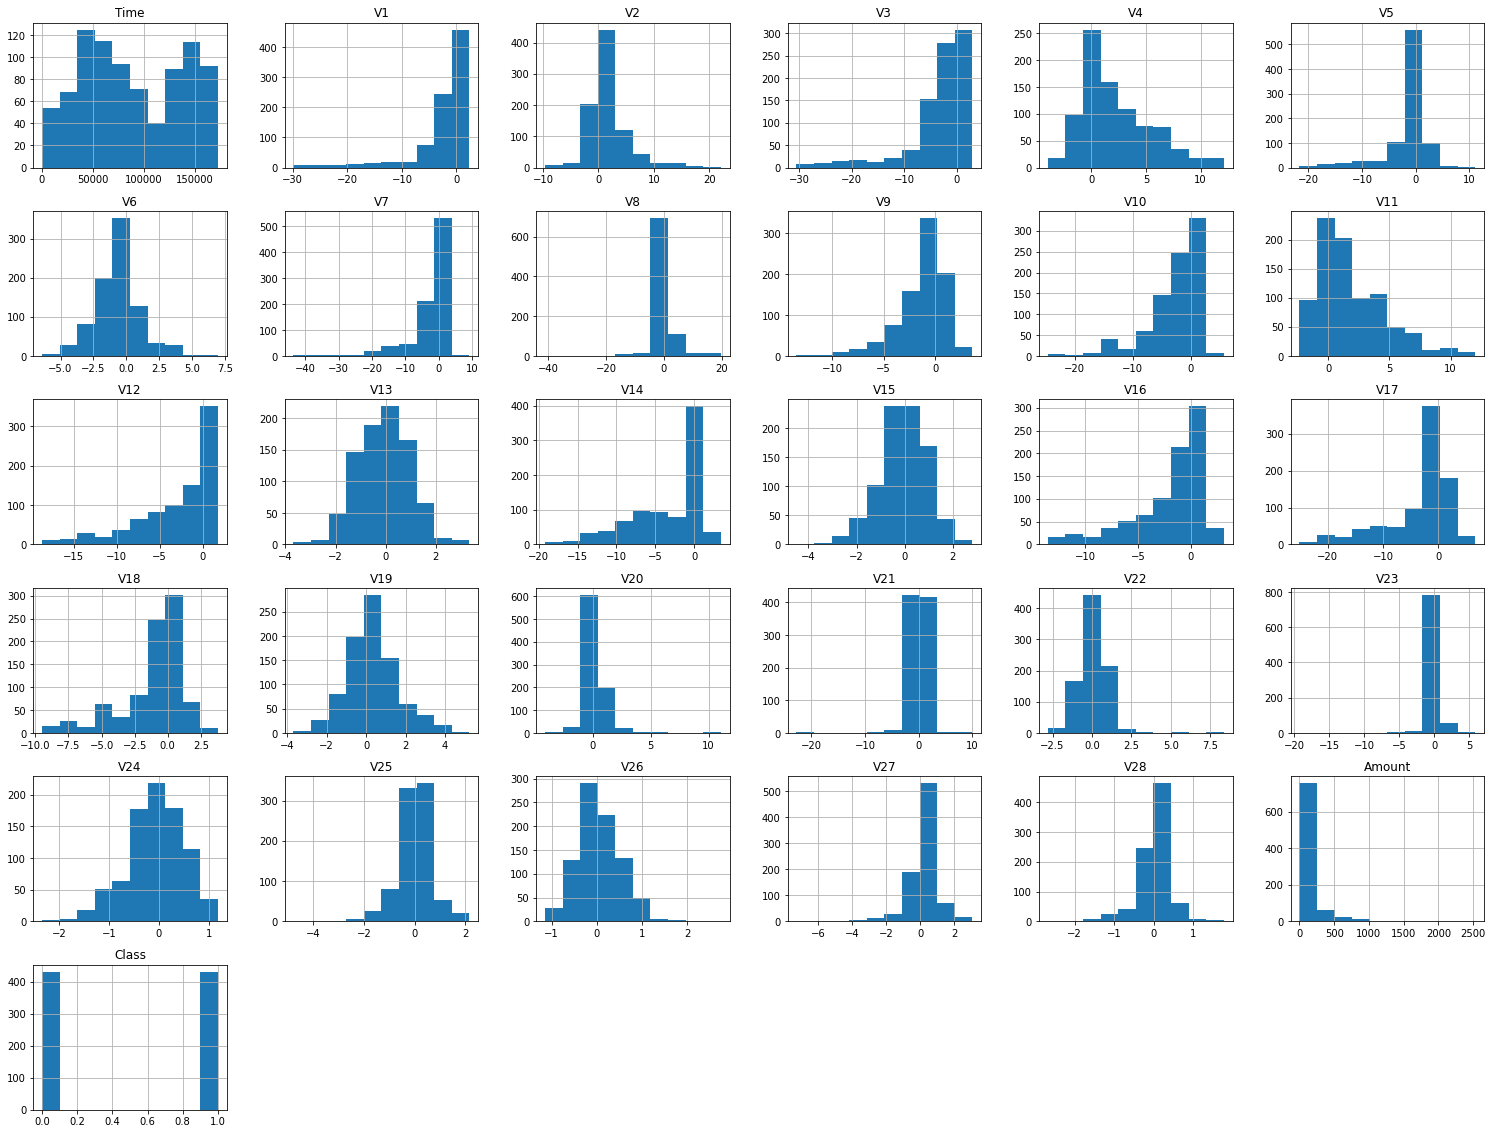

In [ ]:
X_train_samp.hist(figsize=(26,20))
None

Мы не знаем что означают признаки V1-V28, поэтому будем ориентироваться на форму гистограмм. Большая часть отличается от нормального распределения: либо увеличивается частота при больших значениях, либо частота такая большая, что больше похоже на единственное значение для всего train. Заменим такие признаки на их кубические корни.

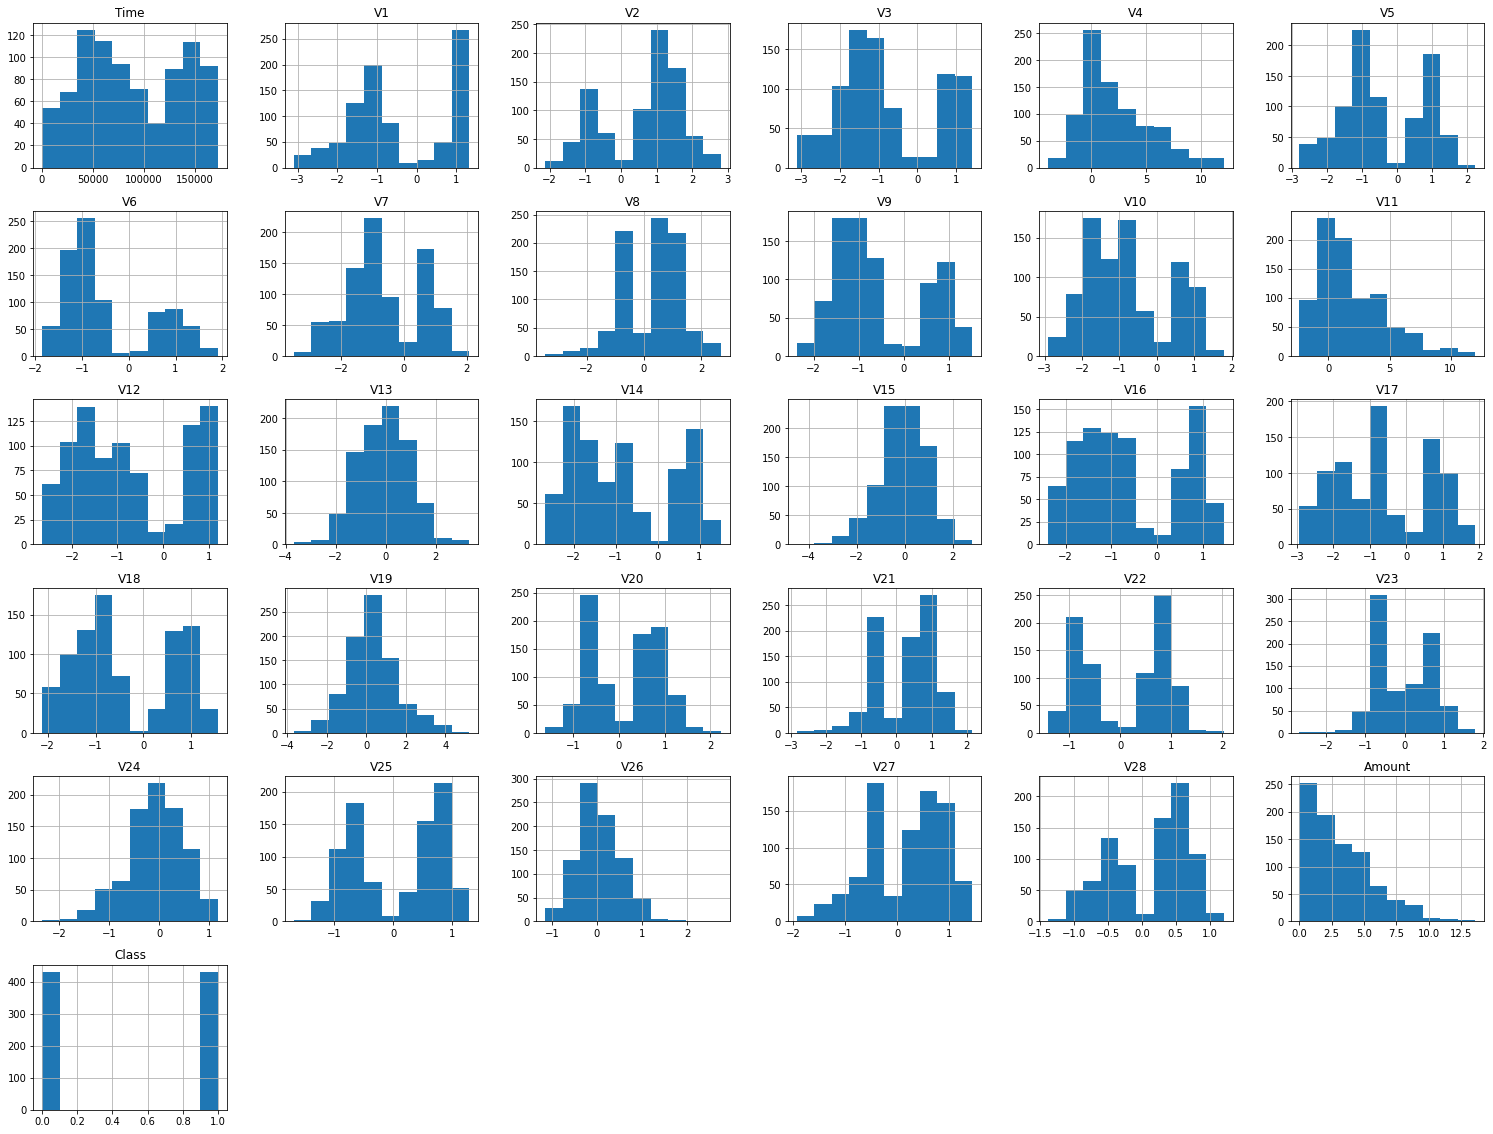

In [ ]:
X_train_1 = X_train_samp.copy(deep=True)

list_cbrt=['V1','V2','V3','V5','V6','V7','V8','V9','V10','V12','V14','V16','V17','V18','V20','V21','V22','V23','V25','V27','V28','Amount']
for i in list_cbrt:
  X_train_1[i]= np.cbrt(X_train_1[i])

X_train_1.hist(figsize=(26,20))
None

Теперь гистограммы выглядят лучше. И некоторые даже стали похожи на нормальное распределение.

Видим, что большинство гистограмм делятся на две группы. Ниже посмотрим гистограммы по некоторым признакам отдельно для 0 класса (хорошая транзакция) и 1 класса (плохая транзакция). Например, для признака V2 у плохой транзакции чаще встречаются значения больше 0, а у хорошей и больше и меньше 0. Для признаков V3, V9, V14 у плохой транзакции чаще встречаются значения меньше 0, а у хорошей и больше и меньше 0.

Думаю на таких данных мы сможем получить хорошее предсказание модели.

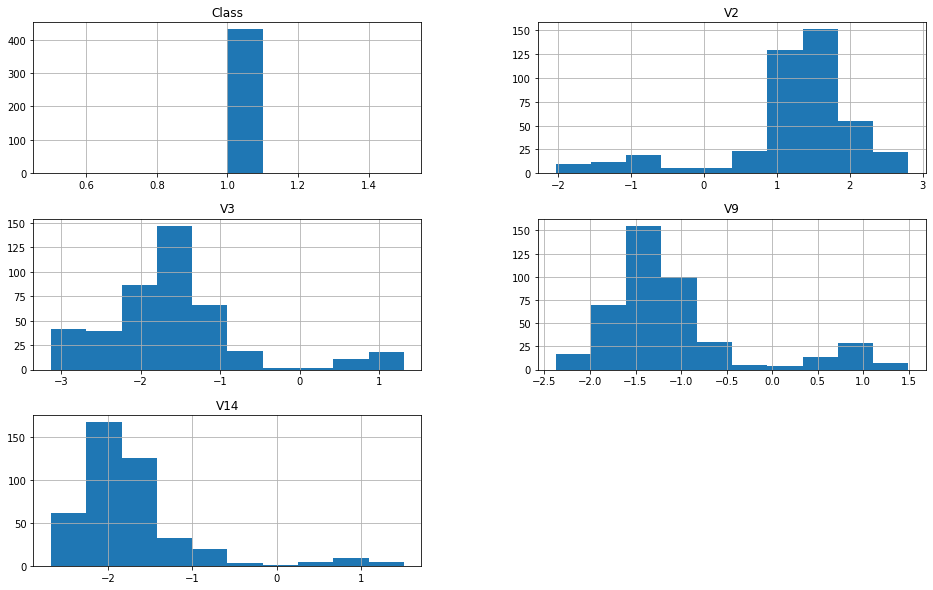

In [ ]:
X_train_1[X_train_1['Class']==1][['Class','V2','V3','V9','V14']].hist(figsize=(16,10))
None

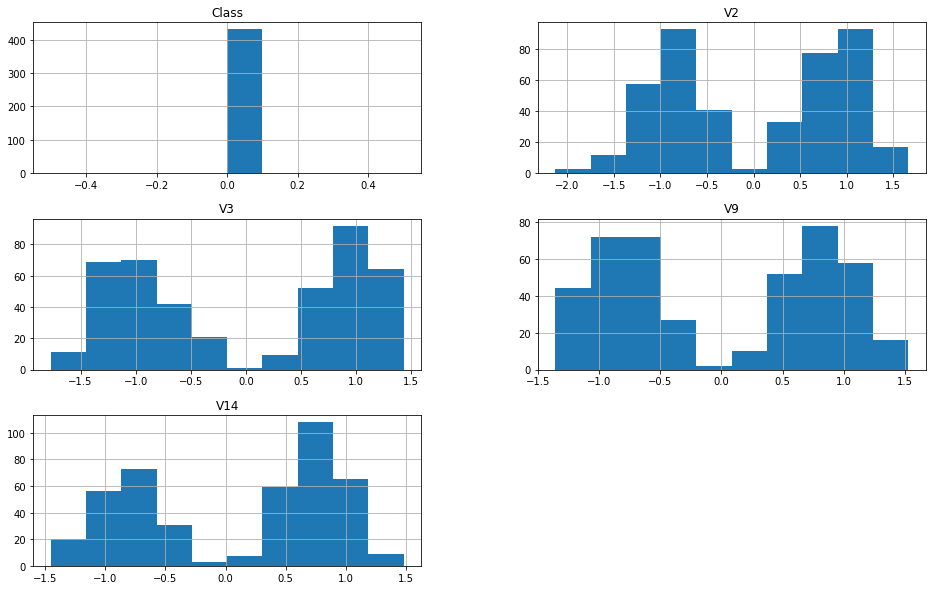

In [ ]:
X_train_1[X_train_1['Class']==0][['Class','V2','V3','V9','V14']].hist(figsize=(16,10))
None

Применим для test аналогичные изменения признаков.

In [ ]:
X_train_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
276710,167255.0,-1.032355,-1.063708,-1.346435,-0.283915,-1.143750,0.534119,1.519210,-0.516765,-0.818715,...,0.922633,0.944209,1.278165,0.613334,-1.132623,0.278936,-0.499488,0.694919,9.224478,0
242830,151675.0,1.269644,-0.360461,-1.020139,0.421189,-0.494868,-1.064700,0.605481,-0.711305,0.783366,...,-0.653729,-0.874849,0.690787,0.057433,-0.661332,0.193226,-0.411460,-0.386254,2.134136,0
114064,73317.0,-1.164525,0.841880,-0.755153,-1.607983,-0.973581,-1.133433,0.892482,0.816086,0.909901,...,0.538816,0.784133,0.565903,0.380294,-0.171623,-0.816735,0.558685,-0.419843,4.820285,0
262909,160707.0,1.270351,0.397372,-1.485598,0.111033,1.457082,1.447262,0.560671,0.834455,-0.672887,...,0.494775,0.696181,0.283246,0.700932,0.798253,-0.463857,-0.239154,-0.410846,2.029561,0
129602,79151.0,1.106255,-1.073152,1.030736,-1.146827,-1.304246,-1.022014,-1.067891,-0.530928,-1.164686,...,-0.558902,-0.624960,0.528165,0.875591,0.393022,-0.334077,0.358599,0.358297,3.983684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6609,8090.0,-1.212651,1.504106,-1.563598,2.625368,-1.254949,-1.397903,-1.508186,1.122195,-0.919312,...,0.768591,-0.832768,0.358218,0.461700,0.353425,0.305704,0.809766,0.624663,1.000000,1
16780,28143.0,-3.005312,2.486099,-3.051246,6.370895,-2.718387,-1.671057,-2.654731,2.616053,-1.549778,...,1.215725,-1.251672,-0.966292,0.144011,1.265022,-0.204214,1.100318,0.728039,4.641434,1
89190,62467.0,-1.748397,-0.658669,-1.565351,5.337048,-1.966949,1.570645,1.088483,0.586496,-1.442815,...,0.651092,1.103034,-1.005496,-0.071361,-0.695115,0.441044,1.149934,-1.037241,11.192640,1
6331,7526.0,0.203524,1.605429,-1.841101,6.675732,0.915893,-1.496742,-1.177289,0.536720,-1.408770,...,0.714340,-0.847191,-0.814088,0.128940,1.141777,0.507963,0.902799,0.800819,1.000000,1


In [ ]:
X_test_1 = X_test.copy(deep=True)

list_cbrt=['V1','V2','V3','V5','V6','V7','V8','V9','V10','V12','V14','V16','V17','V18','V20','V21','V22','V23','V25','V27','V28','Amount']
for i in list_cbrt:
  X_test_1[i]= np.cbrt(X_test_1[i])

y_train = X_train_1['Class']
X_train_1 = X_train_1.drop(columns=['Class']) # убираем столбец с целевой переменной

Нормализуем данные в train и test.

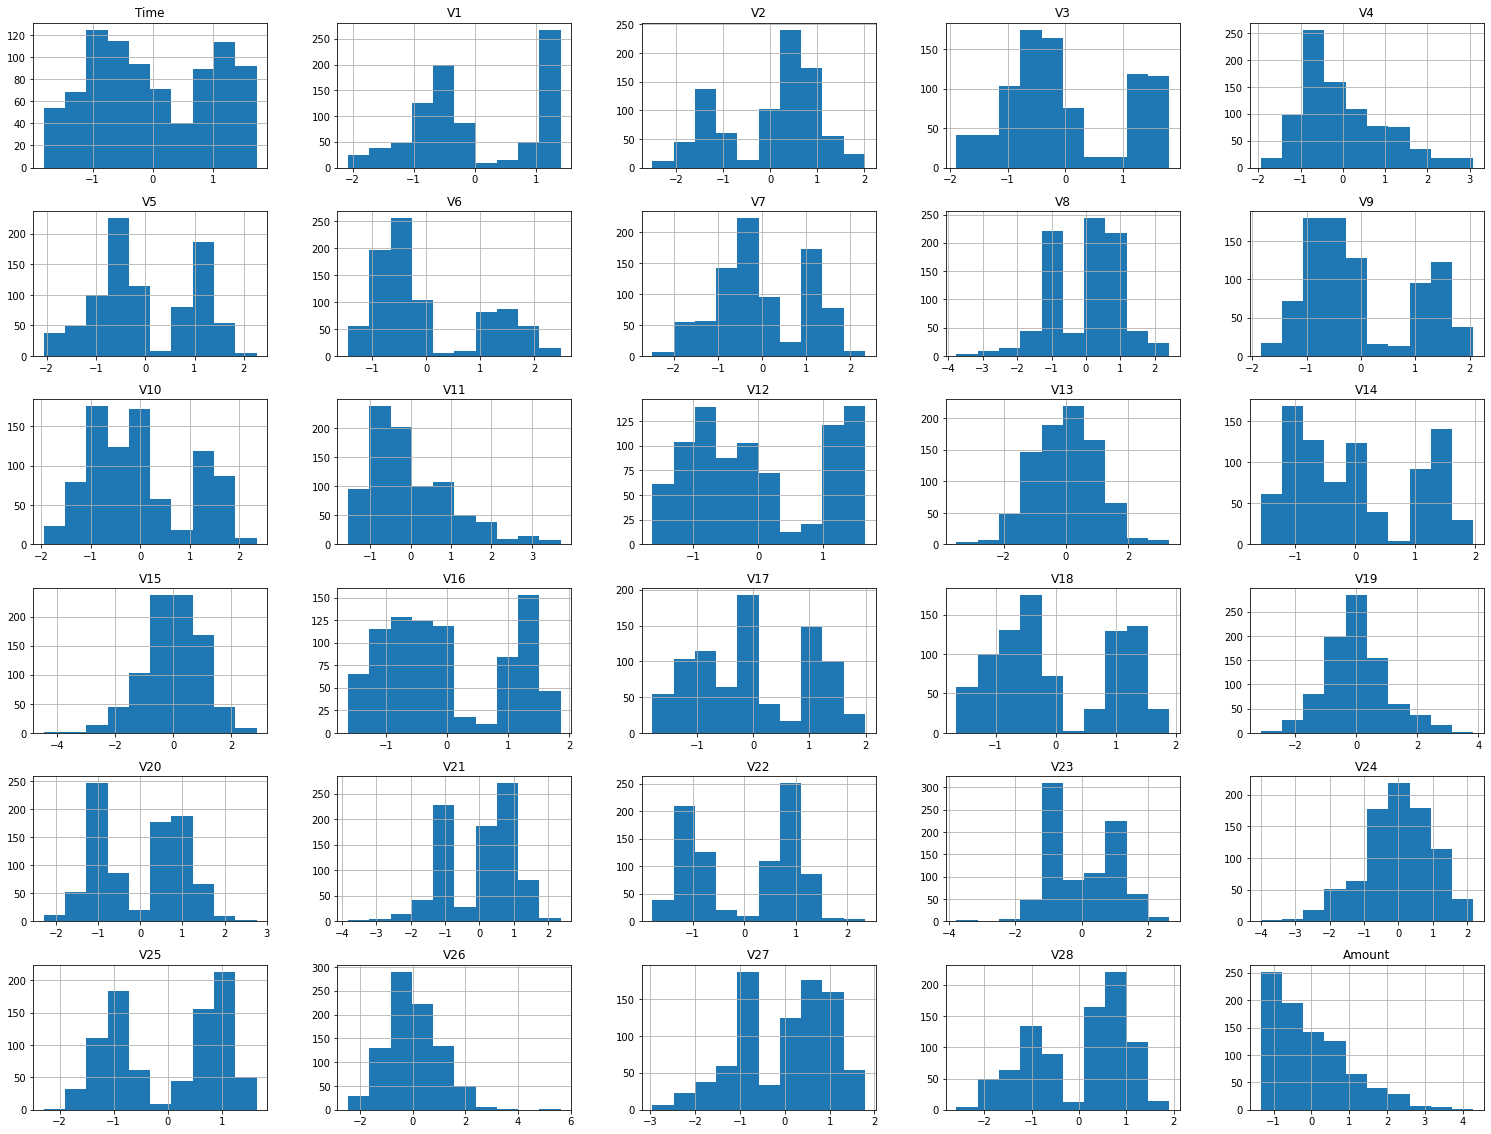

In [ ]:
from sklearn.preprocessing import StandardScaler
list_column_all = X_train_1.columns.tolist()

pca = StandardScaler()
pca.fit(X_train_1)
X_train_1=pca.transform(X_train_1)
X_test_1=pca.transform(X_test_1) # применяем к test нормировку с mu и sigma из train

# переписываем названия столбцов, которые потерялить после нормализации
X_train_1 = pd.DataFrame(data = X_train_1, columns=list_column_all) 
X_test_1 = pd.DataFrame(data = X_test_1, columns=list_column_all)  

X_train_1.hist(figsize=(26,20))
None

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

Посмотрим на три модели, которые предлагаются в задании. Нам еще рассказывали 23.04 про использование Решающих деревьев в классификации, но я пока не умею ими пользоваться. Поэтому смотрим на:
*   константную модель - считаем, что все операции хорошие. т.е. все имеют класс = 0 и вероятность плохой операци для каждой транзакции = 0
*   линейную регрессию
*   KNN

In [ ]:
y_pred_const = np.zeros(len(X_test_1))  # предсказание класса = 0
y_pred_proba_const = y_pred_const  # вероятность плохой транзакции = 0
y_pred_proba_const

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 
log_reg.fit(X_train_1, y_train)
y_pred_log_reg = log_reg.predict(X_test_1)  # предсказание класса
y_pred_proba_log_reg = log_reg.predict_proba(X_test_1)[:, 1]  # вероятность плохой транзакции, оставили только второй столбец
y_pred_proba_log_reg

array([0.04872052, 0.00371748, 0.03126321, ..., 0.05105477, 0.05212535,
       0.09801493])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_1, y_train)
y_pred_knn_reg = knn.predict(X_test_1)  # предсказание класса
y_pred_proba_knn_reg = knn.predict_proba(X_test_1)[:, 1]  # вероятность плохой транзакции, оставили только второй столбец
y_pred_proba_knn_reg

array([0. , 0. , 0. , ..., 0. , 0. , 0.2])

Для каждой из трех моделей посмотрим на метрики accuracy, precision, recall, f1, roc_auc и построем ROC-кривую.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
pd.DataFrame({'method':['const','LogReg','KNN'],
              'accuracy':[accuracy_score(y_test,y_pred_const),
                          accuracy_score(y_test,y_pred_log_reg),
                          accuracy_score(y_test,y_pred_knn_reg)],
              'precision':[precision_score(y_test,y_pred_const),
                           precision_score(y_test,y_pred_log_reg),
                           precision_score(y_test,y_pred_knn_reg)],
              'recall':[recall_score(y_test,y_pred_const),
                        recall_score(y_test,y_pred_log_reg),
                        recall_score(y_test,y_pred_knn_reg)],
              'f1':[f1_score(y_test,y_pred_const),
                    f1_score(y_test,y_pred_log_reg),
                    f1_score(y_test,y_pred_knn_reg)],
              'roc_auc':[roc_auc_score(y_test,y_pred_proba_const),
                         roc_auc_score(y_test,y_pred_proba_log_reg),
                         roc_auc_score(y_test,y_pred_proba_knn_reg)]
              })

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



,method,accuracy,precision,recall,f1,roc_auc
0,const,0.998520,0.00000,0.000000,0.000000,0.500000
1,LogReg,0.960103,0.03259,0.904762,0.062914,0.970790
2,KNN,0.974095,0.04824,0.880952,0.091471,0.975159


Вспомним что означает каждая метрика:


*   accuracy - доля транзакций с правильно предсказанным плохим классом 1
*   precision - точность, сколько плохих транзакций, которые мы нашли действительно плохие
*   recall - полнота, все ли плохие транзакции мы нашли
*   f1 - среднее гармоническое precision и recall
*   roc_auc - показывает как хорошо мы предсказали вероятности с точки зрения порядкалнота, все ли плохие транзакции мы нашли

Получившиеся значения метрик говорят, что
1.   Константная модель показывает замечательное accuracy=0,999. Только precision и recall равну нулю . Значит мы не нашли ни одну плохую транзакцию. А такая модель бесполезна. И ROC-кривая доказывает, что модель плохая, она идет по биссектрисе квадрата.
2.   KNN модель показывает чуть меньшее accuracy=0,975. Precision = 0.048, значит из всех транзакций, которые мы отметили как плохие, только 4,8% действительно являются плохими. Recall = 0.833, значит из всех плохих транзакций, которые действительно есть в dataset мы нашли 83,3%. ROC-кривая  близка к сторонам квадрата , поэтому считаем, что модель дает хорошие результаты.
3.   LogReg модель показывает чуть меньшее accuracy=0,964, чем KNN модель. Precision = 0.036, значит из всех транзакций, которые мы отметили как плохие, только 3,6% действительно являются плохими. Recall = 0.905, значит из всех плохих транзакций, которые действительно есть в dataset мы нашли 90,5%. ROC-кривая  близка к сторонам квадрата , поэтому считаем, что модель дает хорошие результаты.

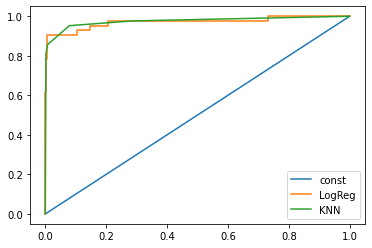

In [ ]:
fpr_1, tpr_1, threshold_1 = roc_curve(y_test,y_pred_proba_const)
plt.plot(fpr_1, tpr_1)
fpr_2, tpr_2, threshold_2 = roc_curve(y_test,y_pred_proba_log_reg)
plt.plot(fpr_2, tpr_2)
fpr_3, tpr_3, threshold_3 = roc_curve(y_test,y_pred_proba_knn_reg)
plt.plot(fpr_3, tpr_3)
plt.legend(['const','LogReg','KNN'])
None

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Для нашей задачи самой важной мтрикой является recall - полнота. Она показывает сколько плохих транзакций мы нашли из всех имеющихся плохих транзакций. Думаю, что в идеяле важно найти каждую, пусть даже для этого надо проверить еще 100 дополнительных операций. Поэтому в данноей задаче я бы выбрала LogReg с большей Recall = 0.905. 

Думаю использовать только результат LogReg для автоматического бана пользователей тоже не верно. Да, мы сможем найти 90% всех плохих транзакций. Пусть один человек совершает одну транзакцию. Тогда если забанить 100, то только 3-4 человека действительно совершали плохие операции. Значит остальные 97 клиентов будут недовольны и через какое=то время мы можем их потерять. Т.е. результат LogReg можно использовать как первоначальное сито плохих транзакций, а потом добавить еще несколько более мелких сит, чтобы в остатке осталось как можно меньше хороших транзакций.

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

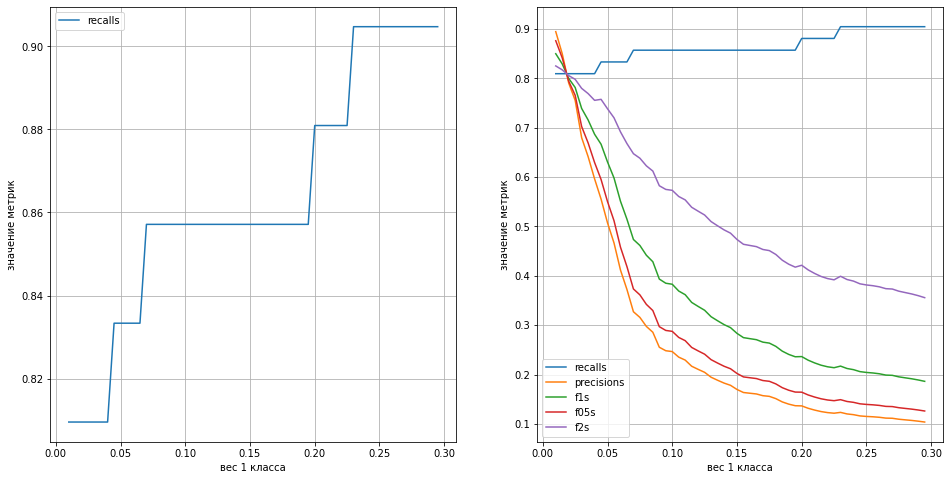

In [ ]:
from sklearn.metrics import fbeta_score
precisions = []
recalls = []
f1s = []
f05s = []
f2s = []

weights = np.arange(0.01, 0.3,0.005)
for i in weights:
  log_reg_w = LogisticRegression(class_weight={0:1, 1:i}, max_iter=1000)
  log_reg_w.fit(X_train_1, y_train)
  y_pred = log_reg_w.predict(X_test_1)
  precisions.append(precision_score(y_test, y_pred))
  recalls.append(recall_score(y_test, y_pred))
  f05s.append(fbeta_score(y_test, y_pred, beta=0.5))
  f2s.append(fbeta_score(y_test, y_pred, beta=2))
  f1s.append(fbeta_score(y_test, y_pred, beta=1))

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.plot(weights, recalls,label='recalls')
plt.xlabel('вес 1 класса')
plt.ylabel('значение метрик')
plt.legend()
plt.grid()
plt.subplot(1,2,2)
plt.plot(weights, recalls,label='recalls')
plt.plot(weights, precisions,label='precisions')
plt.plot(weights, f1s,label='f1s')
plt.plot(weights, f05s,label='f05s')
plt.plot(weights, f2s,label='f2s')
plt.xlabel('вес 1 класса')
plt.ylabel('значение метрик')
plt.legend()
plt.grid()
plt.show()

По графику F1-метрики видим, что оптимальным весами для LogReg являются: 1 для 0 класса и 0,02 для 1 класса. В этом случае precision и recall равну 0,8. Только в итоге мы потеряли в recall, было 0,9 стало 0,8. Если смотреть на F2 (больший коэффициент ставим recall в греднегармоническом precision и recall), то тоже оптимальное значение в этой же точке.

Думаю в данной задаче важнее recall. Лучше найти человека, который крадет миллионы и дополнительно проверить 90 человек, которые покупают хлеб. Поэтому в данном случае оставлю вес = 1 для первого класса (плохие транзакции).

Попробуем убрать признаки с дисперсией меньше 0,9 и выделить 5 лучших признаков по ANOVA. Посмотрим для них recall.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression() 
log_reg.fit(X_train_1, y_train)
y_pred_log_reg = log_reg.predict(X_test_1)  # предсказание класса
y_pred_proba_log_reg = log_reg.predict_proba(X_test_1)[:, 1]  # вероятность плохой транзакции, оставили только второй столбец
y_pred_proba_log_reg
print('recall_score на всех признаках = ',recall_score(y_test, y_pred_log_reg),'\n')

# Выбираем 5 лучших фичей с помощью скоринговой функции для классификации f_classif в методе ANOVA
x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(X_train_1, y_train)

# Выбираем фичи по граничному значению дисперсии данных =0,9
x_data_varth = VarianceThreshold(.9).fit_transform(X_train_1)

# Результат для исходных данных
print('cross_val_score на исходных данных =',cross_val_score(
    LogisticRegression(), X_train_1, y_train, scoring='recall').mean())
# Для отбора по вариативности
print('cross_val_score для признаков с D>0.9 =',cross_val_score(
    LogisticRegression(), x_data_varth, y_train, scoring='recall').mean())
# Для отбора по ANOVA
print('cross_val_score на 5 признаках ANOVA =',cross_val_score(
    LogisticRegression(), x_data_kbest, y_train, scoring='recall').mean())

recall_score на всех признаках =  0.9047619047619048 

cross_val_score на исходных данных = 0.9142475273990911
cross_val_score для признаков с D>0.9 = 0.9142475273990911
cross_val_score на 5 признаках ANOVA = 0.9142475273990911


Модель с признаками с дисперсией > 0,9 дает такую же recall как наша исходная модель. А выделенные 5 лучших признаков по ANOVA чуть увеличили recall до 0,912.

Посмотрим какие recall получатся для признаков от 3 до 36 по ANOVA.

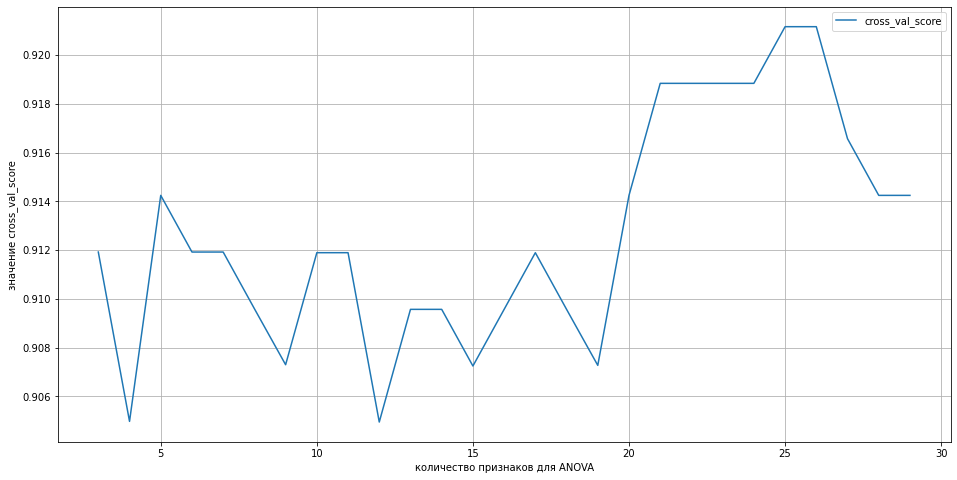

In [ ]:
cross_list = []
weights = range(3, len(list_column_all))
for i in weights:
  x_data_kbest = SelectKBest(f_classif, k=i).fit_transform(X_train_1, y_train)
  cross_list.append(cross_val_score(
    LogisticRegression(), x_data_kbest, y_train, scoring='recall').mean())

plt.figure(figsize=(16, 8))
plt.plot(weights, cross_list,label='cross_val_score')
plt.xlabel('количество признаков для ANOVA')
plt.ylabel('значение cross_val_score')
plt.legend()
plt.grid()
plt.show()

In [ ]:
k_best = SelectKBest(f_classif, k=13).fit(X_train_1, y_train)
x_train_kbest = k_best.transform(X_train_1)
print('cross_val_score на 13 признаках ANOVA =',cross_val_score(
    LogisticRegression(), x_train_kbest, y_train, scoring='recall').mean())

cross_val_score на 13 признаках ANOVA = 0.9095696337877573


Выбирая 13 по ANOVA мы получим больший cross_val_score, чем для исходных 36 признаков. Это не значение recall, его посчитаем ниже.

In [ ]:
x_test_kbest = k_best.transform(X_test_1)
log_reg = LogisticRegression() 
log_reg.fit(x_train_kbest, y_train)
y_pred_log_reg = log_reg.predict(x_test_kbest)  # предсказание класса
y_pred_proba_log_reg = log_reg.predict_proba(x_test_kbest)[:, 1]  # вероятность плохой транзакции, оставили только второй столбец
y_pred_proba_log_reg
print('recall_score на 13 признаках = ',recall_score(y_test, y_pred_log_reg),'\n')

recall_score на 13 признаках =  0.9047619047619048 



Видим, что значение recall для 13 признаков выбранных ANOVA и для всех 36 исходных? одинаковый = 0,905. Значит оставим исходную LogReg без настроек.

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

https://www.kaggle.com/datasets/purumalgi/music-genre-classification?select=test.csv

Посмотрим на dataset музыкальных треков. Для каждого надо определить к какому классу из 11 он относится (Folk_0,Alt_Music_1,Blues_2,Bollywood_3,Country_4,HipHop_5,Indie Alt_6,Instrumental_7,Metal_8,Pop_9,Rock_10). Все признаки, кроме первых двух (Artist Name, Track Name) показывают численные характеристики треков.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import plotly.express as px
import copy

url='https://drive.google.com/file/d/1ZIw9SbDZZdLXKpXwqhDwk0BxWpfJlAkk/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data_music = pd.read_csv(url)

#data_music = pd.read_csv('Music.csv')

list_column_all = data_music.columns.to_list()
list_column_all.remove('Class')
data_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [ ]:
data_music.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
# Посмотрим на данные:
data_music.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


У нас 17996 аудиозаписи и 16 признаков для каждой, `Class` наша целевая переменная.

Видим, что признаки Popularity, key, instrumentalness имеют пропущенные значения 428 - 2014 - 4377 соответвенно

In [ ]:
data_music.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

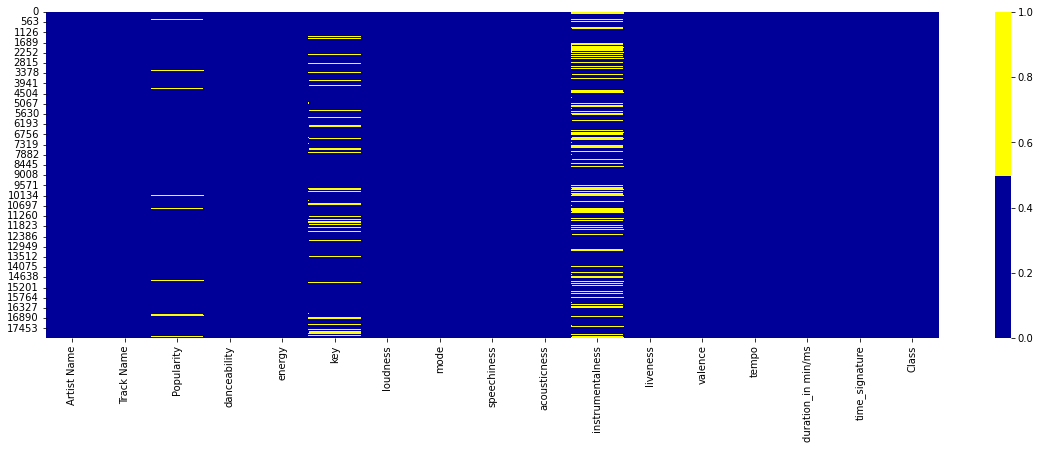

In [ ]:
cols = data_music.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 

plt.figure(figsize = (20,6))
sns.heatmap(data_music[cols].isnull(), cmap=sns.color_palette(colours))
None

In [ ]:
data_music[data_music.duplicated() == True]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class


Дубликатов аудиозаписей нет. Теперь уберем поле Class и проверим на дубликаты.

In [ ]:
data_music[data_music.duplicated(subset=list_column_all) == True]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
350,The Cult,She Sells Sanctuary,69.0,0.550,0.765,7.0,-8.684,1,0.0287,0.000005,0.873000,0.132,0.419,139.460,252533.0,4,6
591,Foreign Air,Monsters,50.0,0.552,0.673,9.0,-4.900,0,0.0298,0.005530,NaN,0.114,0.174,89.993,224053.0,4,9
1073,Carla Geneve,Greg's Discount Chemist,37.0,0.696,0.598,7.0,-5.413,1,0.0301,0.014600,0.000517,0.104,0.515,132.941,209661.0,4,1
1104,The Futureheads,The Beginning Of The Twist,43.0,0.420,0.988,5.0,-2.622,1,0.1570,0.001640,NaN,0.286,0.353,155.993,216040.0,4,1
1141,Brittany Howard,Stay High,54.0,0.598,0.853,9.0,-5.373,1,0.0545,0.132000,0.002970,0.132,0.312,121.988,191396.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,The Marcus King Band,Boone,38.0,0.357,0.757,7.0,-7.487,0,0.0410,0.000843,0.004350,0.262,0.488,169.981,329544.0,4,2
17953,Or Edry,◊ô◊û◊ô ◊®◊ê◊©◊ô◊™ ◊î◊ß◊ô◊•,28.0,0.612,0.676,7.0,-6.977,1,0.0267,0.272000,0.008210,0.237,0.557,130.052,230100.0,4,6
17960,The Flaming Lips,The Yeah Yeah Yeah Song,39.0,0.636,0.887,4.0,-4.354,1,0.0475,0.002570,0.000052,0.293,0.350,107.984,232520.0,4,6
17982,Lucia & The Best Boys,Blueheart,29.0,0.348,0.726,NaN,-4.730,1,0.0449,0.000363,0.000142,0.383,0.661,182.587,169164.0,4,6


Значит для 1673 аудиозиписей указано больше одного класса. Уберем повторяющиеся записи, оставив только первые встречающиеся.

In [ ]:
data_music.drop_duplicates(subset=list_column_all, keep = 'first', inplace = True)

In [ ]:
data_music[data_music.duplicated(subset=list_column_all) == True]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class


Теперь каждая аудиозапись имеет только один класс

Разделим весь наш dataset на train и test.

In [ ]:
X = data_music.drop(columns=['Class']) # убираем столбец с целевой переменной
y = data_music['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train[X_train.duplicated() == True]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature


Проверим, что дубликатов аудиозаписей нет. Нет, дубликатов нет.

NaN значения в столбце instrumentalness указаны для 24% от всех аудиозаписей. Удалять их точно нельзя. Заменим их на медианное значение каждого из признаков: instrumentalness, Popularity, key. Потом при обучении надо попробовать убрать все три признака, может они не влияет на результат. Думаю, что Popularity точно не влияет на Class аудиозаписи. instrumentalness возможно влияет. key не понятно что за признак.

In [ ]:
X_train['Class']=y_train

X_train['Popularity'].fillna((X_train['Popularity'].mean()), inplace=True)
X_train['key'].fillna((X_train['key'].mean()), inplace=True)
X_train['instrumentalness'].fillna((X_train['instrumentalness'].mean()), inplace=True)

In [ ]:
X_train.isna().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
X_test.isna().sum()

Artist Name             0
Track Name              0
Popularity             80
danceability            0
energy                  0
key                   377
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      809
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

В тестовом наборе аудиозаписей тоже есть NaN значения в этих трех признаках, поэтому заменим их на среднее значение по test выборке. Не знаю на сколько правильно так делать для test данных. При обучении надо обязательно попробовать рассмотреть модель без признаков instrumentalness, Popularity, key.

In [ ]:
X_test['Popularity'].fillna((X_test['Popularity'].mean()), inplace=True)
X_test['key'].fillna((X_test['key'].mean()), inplace=True)
X_test['instrumentalness'].fillna((X_test['instrumentalness'].mean()), inplace=True)

Возвращаемся к анализу train части.

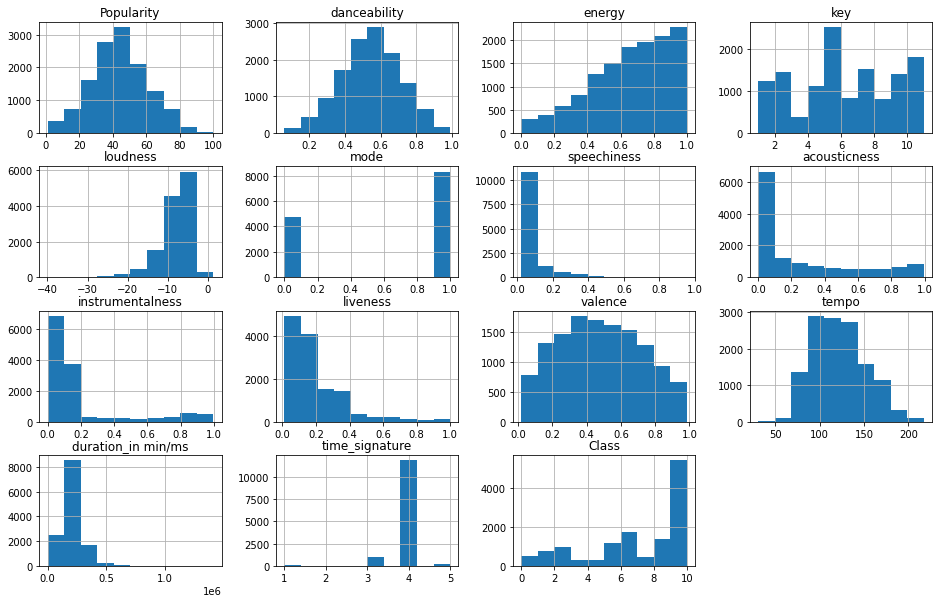

In [ ]:
X_train.hist(figsize=(16,10))
None

Немного изменим некоторые признаки, чтобы они больше были похожи на нормально-распределенные. Признак time_signature = 4 для 91% аудиозаписей, он не информативен. Его точно надо будет убрать из списка признаков для обучения. 

Уберем аудиозаписи с 'duration_in min/ms' более 1_000_000. Их не много, около 13 штук, но они сильно выбиваются из среднего значения по всему признаку 'duration_in min/ms'.

In [ ]:
df = X_train[X_train['duration_in min/ms'] >1_000_000]
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.000000,13.000000
mean,36.153846,0.322385,0.561923,5.610425,-11.077462,0.461538,0.058108,0.310315,0.347490,0.238700,0.259446,111.036231,1.202191e+06,3.769231,9.384615
std,12.634913,0.127343,0.156245,2.500519,2.653039,0.518875,0.025608,0.287289,0.400764,0.240592,0.191023,25.369518,1.474725e+05,0.599145,1.502135
min,16.000000,0.115000,0.322000,2.000000,-16.580000,0.000000,0.032300,0.017800,0.000018,0.071000,0.047000,74.857000,1.019625e+06,3.000000,6.000000
25%,26.000000,0.256000,0.466000,4.000000,-13.366000,0.000000,0.038700,0.147000,0.001700,0.107000,0.144000,88.132000,1.090787e+06,3.000000,10.000000
50%,39.000000,0.310000,0.597000,5.000000,-10.924000,0.000000,0.056000,0.227000,0.155000,0.179000,0.206000,120.089000,1.121253e+06,4.000000,10.000000
75%,45.000000,0.344000,0.610000,7.000000,-9.415000,1.000000,0.072300,0.366000,0.792000,0.187000,0.251000,133.186000,1.385907e+06,4.000000,10.000000
max,57.000000,0.622000,0.866000,10.000000,-7.456000,1.000000,0.115000,0.835000,0.925000,0.950000,0.701000,145.073000,1.412451e+06,5.000000,10.000000


Вснесем изменения в train на основе гистограмм

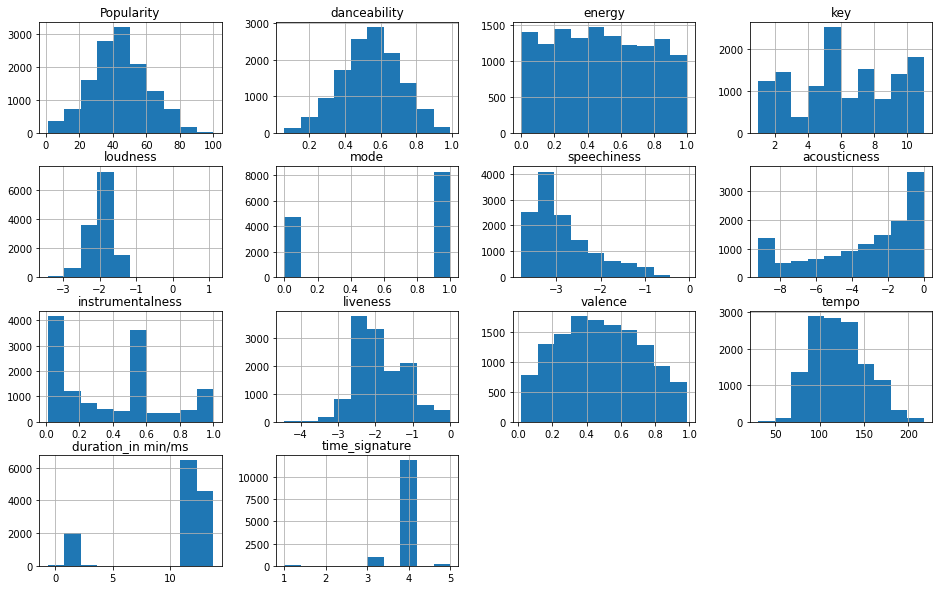

In [ ]:
X_train_1 = X_train.copy(deep=True)
X_train_1['Class']=y_train

X_train_1 = X_train_1[X_train_1['duration_in min/ms'] < 1_000_000]
X_train_1['energy']=np.power(X_train_1['energy'],2)
X_train_1['loudness']=np.cbrt(X_train_1['loudness'])
X_train_1['speechiness']=np.log(X_train_1['speechiness'])
X_train_1['acousticness']=np.log(np.maximum(0.0001,X_train_1['acousticness']))
X_train_1['instrumentalness']=np.cbrt(X_train_1['instrumentalness'])
X_train_1['liveness']=np.log(X_train_1['liveness'])
X_train_1['duration_in min/ms']=np.log(X_train_1['duration_in min/ms'])

y_train =X_train_1['Class']
X_train_1=X_train_1.drop(columns=['Class']) 

X_train_1.hist(figsize=(16,10))
None

Признак instrumentalness тоже не надо рассматривать для обучения. Из-за того, что мы заменили NaN в 24% аудиозаписей на медианное значение, появился выброс, который очень странно смотрится на общей гистограмме.

У нас остались первые два строковых признака Artist Name и Track Name. Думаю их можно убрать из рассмотрения при обучении. Track Name точно никак не повлиет на ее Class. Artist Name еще может нести вклад, т.к. артист исполняет в одном жанре, но при этом с течением времи жанр треков тоже может поменяться. В нашем train слишком много разных исполнителей - 8_000 из 13_000 аудиозаписей, поэтому признак Artist Name мало повлияет на результат. Его тоже удалим из рассмотрения.

In [ ]:
print('всего объектов = ',X_train_1.shape[0])
print('кол-во уникальных значений Artist Name = ',len(X_train_1['Artist Name'].unique()))
print('кол-во уникальных значений Track Name = ',len(X_train_1['Track Name'].unique()))

всего объектов =  13045
кол-во уникальных значений Artist Name =  7786
кол-во уникальных значений Track Name =  12256


In [ ]:
print(Counter(y_train))
fig = px.pie(y_train, names='Class', title='распределение значений Class')
fig.show(renderer="colab")
None

Counter({10: 3556, 9: 1887, 6: 1722, 8: 1398, 5: 1156, 2: 977, 1: 764, 0: 493, 7: 462, 3: 324, 4: 306})


Больше всего получилось аудиозаписей 10 класса Rock = 27%. Не смотря на это, можно сказать, что train-выборка сбалансирована.
 
Внесем аналогичные изменения в test: прологарифмируем и возведем в степнь.

In [ ]:
X_test_1 = X_test.copy(deep=True)
X_test_1['energy']=np.power(X_test_1['energy'],2)
X_test_1['loudness']=np.cbrt(X_test_1['loudness'])
X_test_1['speechiness']=np.log(X_test_1['speechiness'])
X_test_1['acousticness']=np.log(np.maximum(0.0001,X_test_1['acousticness']))
X_test_1['instrumentalness']=np.cbrt(X_test_1['instrumentalness'])
X_test_1['liveness']=np.log(X_test_1['liveness'])
X_test_1['duration_in min/ms']=np.log(X_test_1['duration_in min/ms'])

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

Посмотрим на три модели, которые предлагаются в задании:
*   константную модель - считаем, что все аудиозаписи имеют класс = 10 и вероятность всех других классов = 0
*   линейную регрессию
*   KNN

Из списка признаков уберем первые два 'Artist Name', 'Track Name'. Потом попробуем заменить имя артиста на число, потому что это может повлиять на Class аудиозаписис 

In [ ]:
list_column_all_1 = ['Popularity', 'danceability', 'energy', 'key', 'loudness', \
                     'mode', 'speechiness', 'acousticness', 'instrumentalness', \
                     'liveness', 'valence', 'tempo', 'duration_in min/ms','time_signature']

Нормализуем данные

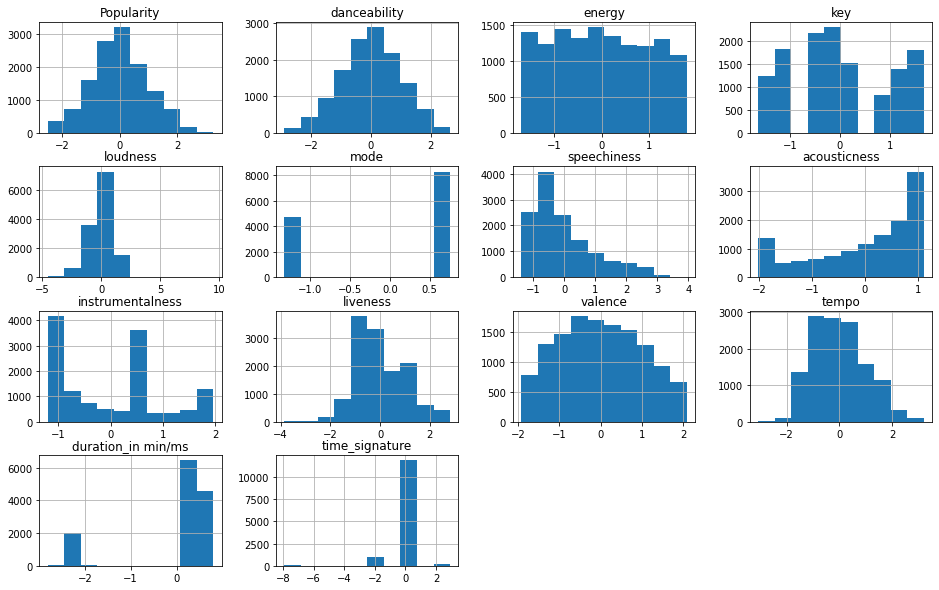

In [ ]:
from sklearn.preprocessing import StandardScaler

y_train = y_train
X_train_1 = X_train_1[list_column_all_1]
X_test_1 = X_test_1[list_column_all_1]

pca = StandardScaler()
pca.fit(X_train_1)
X_train_1=pca.transform(X_train_1)
X_test_1=pca.transform(X_test_1) # применяем к test нормировку с mu и sigma из train

# переписываем названия столбцов, которые потерялить после нормализации
X_train_1 = pd.DataFrame(data = X_train_1, columns=list_column_all_1) 
X_test_1 = pd.DataFrame(data = X_test_1, columns=list_column_all_1)  

X_train_1.hist(figsize=(16,10))
None

In [ ]:
y_pred_const = 10 + np.zeros(len(X_test_1))  # предсказание класса = 10
y_pred_const

array([10., 10., 10., ..., 10., 10., 10.])

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100) 
log_reg.fit(X_train_1, y_train)
y_pred_log_reg = log_reg.predict(X_test_1)  # предсказание класса
y_pred_log_reg

array([ 5, 10,  9, ...,  8, 10,  9])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train_1, y_train)
y_pred_knn_reg = knn.predict(X_test_1)  # предсказание класса
y_pred_knn_reg

array([ 6, 10,  9, ...,  8, 10,  9])

Для каждой из трех моделей посмотрим на метрики accuracy, precision, recall, f1.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
pd.DataFrame({'method':['const','LogReg','KNN'],
              'accuracy':[accuracy_score(y_test,y_pred_const),
                          accuracy_score(y_test,y_pred_log_reg),
                          accuracy_score(y_test,y_pred_knn_reg)],
              'precision':[precision_score(y_test,y_pred_const, average='macro'),
                           precision_score(y_test,y_pred_log_reg, average='macro'),
                           precision_score(y_test,y_pred_knn_reg, average='macro')],
              'recall':[recall_score(y_test,y_pred_const, average='macro'),
                        recall_score(y_test,y_pred_log_reg, average='macro'),
                        recall_score(y_test,y_pred_knn_reg, average='macro')],
              'f1':[f1_score(y_test,y_pred_const, average='macro'),
                    f1_score(y_test,y_pred_log_reg, average='macro'),
                    f1_score(y_test,y_pred_knn_reg, average='macro')]
              })

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,method,accuracy,precision,recall,f1
0,const,0.276570,0.025143,0.090909,0.039391
1,LogReg,0.504747,0.502519,0.532553,0.511498
2,KNN,0.451455,0.484181,0.512211,0.496036


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Метрики LogReg и KNN моделей получились выше, чем у константной модели - это хорошо. В данной задаче (определить тип аудиозаписи) думаю надо ориентироватьсяна accuracy-метрику, потому что нельзя сказать что важнее precision или	recall. Можно просмотреть все аудиозаписи и указать им какой-либо класс (precision), но так же будет хорошо, если мы определим верный класс (recall), чтобы разбить на группы треков по типу.

Попробуем убрать признаки с дисперсией меньше 0,9 и выделить 5 лучших признаков по ANOVA. Посмотрим для них accuracy.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

log_reg.fit(X_train_1, y_train)
y_pred_log_reg = log_reg.predict(X_test_1)  # предсказание класса
print('accuracy_score на всех признаках = ',accuracy_score(y_test, y_pred_log_reg),'\n')

# Выбираем 5 лучших фичей с помощью скоринговой функции для классификации f_classif в методе ANOVA
x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(X_train_1, y_train)
#x_train_kbest = k_best.transform(X_train_1)
#x_test_kbest = k_best.transform(X_test_1)

#log_reg_k_best = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100) 
#log_reg_k_best.fit(x_data_kbest, y_train)
#y_pred=log_reg_k_best.predict(x_test_kbest)



# Выбираем 5 лучших фичей с помощью скоринговой функции для классификации f_classif в методе ANOVA
#x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(X_train_1, y_train)

# Выбираем фичи по граничному значению дисперсии данных =0,9
x_data_varth = VarianceThreshold(.9).fit_transform(X_train_1)

# Результат для исходных данных
print('cross_val_score на исходных данных =',cross_val_score(
    log_reg, X_train_1, y_train, cv=5, scoring='accuracy').mean())
# Для отбора по вариативности
print('cross_val_score для признаков с D>0.9 =',cross_val_score(
   log_reg, x_data_varth, y_train, cv=5, scoring='accuracy').mean())
# Для отбора по ANOVA
print('cross_val_score на 5 признаках ANOVA =',cross_val_score(
    log_reg, x_data_kbest, y_train, cv=5, scoring='accuracy').mean())



# Выбираем фичи по граничному значению дисперсии данных =0,9
#var_th = VarianceThreshold(.9).fit(X_train_1, y_train)
#x_data_varth = var_th.transform(X_train_1)

#print('SelectKBest \n',classification_report(y_test,y_pred))

#from sklearn.model_selection import KFold
#kfold = KFold(n_splits=3, random_state=42)
#cv_results = cross_val_score(log_reg_k_best, X_train_1, y_train, cv=5, scoring='accuracy')
#cv_results.mean()
# Результат для исходных данных
#print('cross_val_score на исходных данных =',cross_val_score(
#    log_reg_k_best, X_train_1, y_train, scoring='accuracy').mean())
#pd.DataFrame({'method':['SelectKBest'],
#              'accuracy':[accuracy_score(y_test,y_pred)],
#              'precision':[precision_score(y_test,y_pred, average='macro')],
#              'recall':[recall_score(y_test,y_pred, average='macro')],
#              'f1':[f1_score(y_test,y_pred, average='macro')]
#              })

accuracy_score на всех признаках =  0.5047473200612558 

cross_val_score на исходных данных = 0.5048677654273668
cross_val_score для признаков с D>0.9 = 0.5048677654273668
cross_val_score на 5 признаках ANOVA = 0.4420850900728248


Модель с признаками с дисперсией > 0,9 дает такую же cross_val_score как наша исходная модель. А выделенные 5 лучших признаков по ANOVA уменьшило cross_val_score до 0,442.

Посмотрим какие cross_val_score получатся для признаков от 3 до 14 по ANOVA.

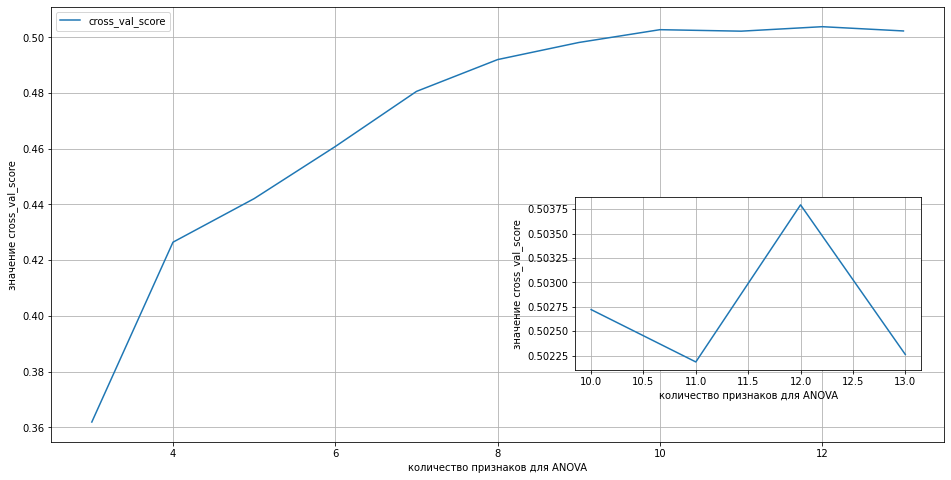

In [ ]:
cross_list = []
weights = range(3, len(list_column_all_1))
for i in weights:
  x_data_kbest = SelectKBest(f_classif, k=i).fit_transform(X_train_1, y_train)
  cross_list.append(cross_val_score(
    log_reg, x_data_kbest, y_train, cv=5, scoring='accuracy').mean())

plt.figure(figsize=(16, 8))
plt.plot(weights, cross_list,label='cross_val_score')
plt.xlabel('количество признаков для ANOVA')
plt.ylabel('значение cross_val_score')
plt.legend()
plt.grid()
plt.axes([.58, .25, .3, .3])
plt.plot(weights[7:], cross_list[7:])
plt.xlabel('количество признаков для ANOVA')
plt.ylabel('значение cross_val_score')
plt.grid()
plt.show()

Выбирая 12 признаков по ANOVA мы получим больший cross_val_score, чем для исходных 13 признаков. Посчитаем accuracy для 11-12-13 признаков.

In [ ]:
for i in range(11,14):
  k_best = SelectKBest(f_classif, k=i).fit(X_train_1, y_train)
  x_train_kbest = k_best.transform(X_train_1)
  x_test_kbest = k_best.transform(X_test_1)
  log_reg_k_best = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100)
  log_reg_k_best.fit(x_train_kbest, y_train)
  y_pred=log_reg_k_best.predict(x_test_kbest)
  print('accuracy_score на',i,' признаках ANOVA =',accuracy_score(y_test,y_pred))

accuracy_score на 11  признаках ANOVA = 0.507197549770291
accuracy_score на 12  признаках ANOVA = 0.5068912710566615
accuracy_score на 13  признаках ANOVA = 0.5075038284839204


Видим, что значение accuracy для 12 признаков выбранных ANOVA меньше, чем для 13, поэтому оставим исходную LogReg без настроек. У нее acuracy = 0.505

Попробуем изменить количество соседей в KNN. Может получится увеличить accuracy.

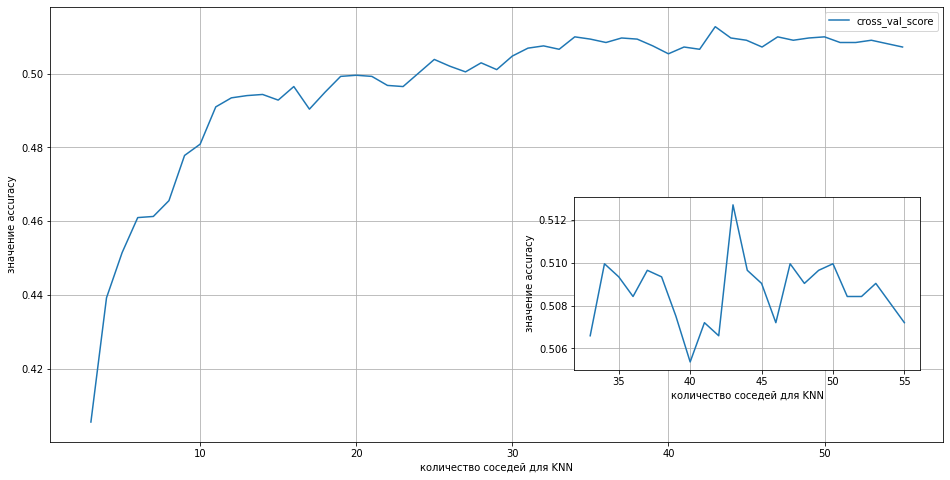

In [ ]:
knn_list = []
weights = range(3, 4*len(list_column_all_1))
for i in weights:
  knn = KNeighborsClassifier(n_neighbors=i) 
  knn.fit(X_train_1, y_train)
  y_pred_knn_reg = knn.predict(X_test_1)
  knn_list.append(accuracy_score(y_test,y_pred_knn_reg))

plt.figure(figsize=(16, 8))
plt.plot(weights, knn_list,label='cross_val_score')
plt.xlabel('количество соседей для KNN')
plt.ylabel('значение accuracy')
plt.legend()
plt.grid()
plt.axes([.58, .25, .3, .3])
plt.plot(weights[30:], knn_list[30:])
plt.xlabel('количество соседей для KNN')
plt.ylabel('значение accuracy')
plt.grid()
plt.show()




In [ ]:
log_reg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100) 
log_reg.fit(X_train_1, y_train)
y_pred_log_reg = log_reg.predict(X_test_1)  # предсказание класса

knn = KNeighborsClassifier(n_neighbors=43) 
knn.fit(X_train_1, y_train)
y_pred_knn_reg = knn.predict(X_test_1)  # предсказание класса

pd.DataFrame({'method':['const','LogReg','KNN'],
              'accuracy':[accuracy_score(y_test,y_pred_const),
                          accuracy_score(y_test,y_pred_log_reg),
                          accuracy_score(y_test,y_pred_knn_reg)],
              'precision':[precision_score(y_test,y_pred_const, average='macro'),
                           precision_score(y_test,y_pred_log_reg, average='macro'),
                           precision_score(y_test,y_pred_knn_reg, average='macro')],
              'recall':[recall_score(y_test,y_pred_const, average='macro'),
                        recall_score(y_test,y_pred_log_reg, average='macro'),
                        recall_score(y_test,y_pred_knn_reg, average='macro')],
              'f1':[f1_score(y_test,y_pred_const, average='macro'),
                    f1_score(y_test,y_pred_log_reg, average='macro'),
                    f1_score(y_test,y_pred_knn_reg, average='macro')]
              })

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



,method,accuracy,precision,recall,f1
0,const,0.276570,0.025143,0.090909,0.039391
1,LogReg,0.504747,0.502519,0.532553,0.511498
2,KNN,0.512711,0.555446,0.539406,0.522692


Сейчас accuracy больше у KNN-модели. Надо попробовать улучшить LogReg. Если не выйдет, то возьмем текущую KNN.

Попробуем занулить признаки через L1. Для LogisticRegression можно указать penalty='l1' только для двух solver='liblinear' или = 'saga'. Но они оба не подходят для многоклассовой классификации. Поэтому оставим solver='lbfgs', заданный по умолчанию.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

pipe = make_pipeline(SelectFromModel(estimator=LogisticRegression(penalty='l1', solver='liblinear')), LogisticRegression(solver='liblinear'))
print(cross_val_score(pipe, X_train_1, y_train, scoring='accuracy').mean())

0.5027213491759295


Попробуем улучшить LogisticRegression через жадный алгоритм SequentialFeatureSelector

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import  SequentialFeatureSelector

In [ ]:
SFS_list = []
weights = range(3, len(list_column_all_1))
for i in weights:
  selector = SequentialFeatureSelector(LogisticRegression(multi_class='ovr', max_iter=100), scoring='accuracy', k_features=i)
  selector.fit(X_train_1, y_train)
  X_train_SFS=selector.transform(X_train_1)
  X_test_SFS=selector.transform(X_test_1)
  log_reg_SFS = LogisticRegression(multi_class='ovr', max_iter=100) 
  log_reg_SFS.fit(X_train_SFS, y_train)
  y_pred_log_reg_SFS = log_reg_SFS.predict(X_test_SFS)
  SFS_list.append(accuracy_score(y_test,y_pred_log_reg_SFS))

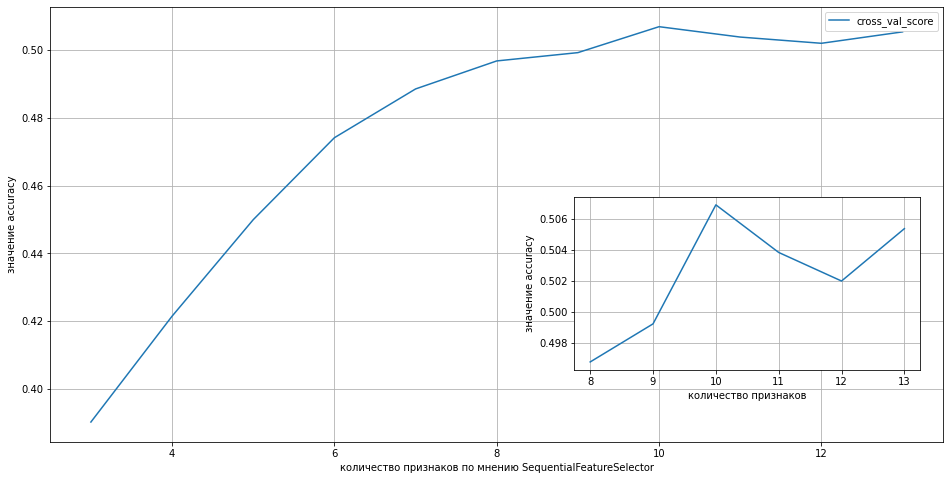

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(weights, SFS_list,label='cross_val_score')
plt.xlabel('количество признаков по мнению SequentialFeatureSelector')
plt.ylabel('значение accuracy')
plt.legend()
plt.grid()
plt.axes([.58, .25, .3, .3])
plt.plot(weights[5:], SFS_list[5:])
plt.xlabel('количество признаков')
plt.ylabel('значение accuracy')
plt.grid()
plt.show()

In [ ]:
weights[7], SFS_list[7]

(10, 0.5068912710566615)

SequentialFeatureSelector подобрал нам для ЛогРег 10 хороших признаков. На них accuracy = 0,507. Это меньше, чем для KNN (n_neighbors=43) c accuracy = 0,513. Значит в данной задаче выбираем KNN

In [ ]:
print('KNN (n_neighbors=43) \n',classification_report(y_test,y_pred_knn_reg))

KNN (n_neighbors=43) 
               precision    recall  f1-score   support

           0       0.61      0.77      0.68       132
           1       0.43      0.02      0.03       187
           2       0.42      0.35      0.38       243
           3       0.75      0.63      0.69        78
           4       0.50      0.68      0.58        81
           5       0.62      0.74      0.68       252
           6       0.38      0.21      0.27       428
           7       0.88      0.90      0.89       114
           8       0.57      0.54      0.56       341
           9       0.48      0.42      0.45       506
          10       0.47      0.67      0.55       903

    accuracy                           0.51      3265
   macro avg       0.56      0.54      0.52      3265
weighted avg       0.50      0.51      0.49      3265

